In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Assign Url
sheet_id = '1wLXAt2bZEGKIeE_mvg1zYUSAfQCjkrDOREjLKxL55ZE'
sheet_name = 'Employee-Attrition'
url = f"https://docs.google.com/spreadsheets/d/{sheet_id}/gviz/tq?tqx=out:csv&sheet={sheet_name}"

df = pd.read_csv(url)

In [3]:
from Fun import Employee_Attrition
EA = Employee_Attrition()

In [4]:
df = EA.clean(df)

In [5]:
job_sat_df = EA.selection(df)[1]
job_sat_df.reset_index(drop=True,inplace=True)

In [6]:
cat_col = job_sat_df.select_dtypes(include=['object'])
num_col = job_sat_df.select_dtypes(include=[np.number]).drop(
            columns = ['joblevel','worklifebalance','environmentsatisfaction','jobinvolvement','relationshipsatisfaction','performancerating','stockoptionlevel','jobsatisfaction']
            )
cat_col_num = job_sat_df[['joblevel','worklifebalance','environmentsatisfaction','jobinvolvement','relationshipsatisfaction','jobsatisfaction','stockoptionlevel']]

In [7]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder

In [8]:
order_list = [  ['sales', 'research & development', 'human resources'],

                ['sales representative',
                'laboratory technician',
                'research scientist',
                'human resources',
                'sales executive',
                'manufacturing director',
                'healthcare representative',
                'research director',
                'manager'],

                ['non-travel','travel_rarely','travel_frequently'],

                ['no', 'yes']
             ]

In [9]:
num_trans = Pipeline(
            steps=[
                ('imputer',SimpleImputer(strategy='median')),
                ('scaler',StandardScaler())
            ]
)
num_trans

,steps,"[('imputer', ...), ('scaler', ...)]"
,transform_input,None
,memory,None
,verbose,False
,missing_values,nan
,strategy,'median'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False
,copy,True


In [10]:
cat_trans = Pipeline(
    steps=[
        ('imputer',SimpleImputer(strategy='most_frequent')),
        ('encoder',OrdinalEncoder(categories=order_list,dtype='int'))
    ]
)
cat_trans

,steps,"[('imputer', ...), ('encoder', ...)]"
,transform_input,None
,memory,None
,verbose,False
,missing_values,nan
,strategy,'most_frequent'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False
,categories,"[['sales', 'research & development', ...], ['sales representative', 'laboratory technician', ...], ...]"


In [11]:
cat_trans1 = Pipeline(
    steps=[
        ('imputer',SimpleImputer(strategy='most_frequent'))
    ]
)
cat_trans1

,steps,"[('imputer', ...)]"
,transform_input,None
,memory,None
,verbose,False
,missing_values,nan
,strategy,'most_frequent'
,fill_value,None
,copy,True
,add_indicator,False
,keep_empty_features,False


In [12]:
preprocess = ColumnTransformer(
                transformers=[
                    ('num',num_trans,num_col.columns),
                    ('cat',cat_trans,cat_col.columns),
                    ('cat1',cat_trans1,cat_col_num.columns)
                ]
)
preprocess

,transformers,"[('num', ...), ('cat', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,missing_values,nan
,strategy,'median'
,fill_value,None


In [13]:
pipe = Pipeline(
    steps = [
        ('preprocess',preprocess)
    ]
)
pipe

,steps,"[('preprocess', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [14]:
x = pd.DataFrame(pipe.fit_transform(job_sat_df),columns=pipe.get_feature_names_out())

In [15]:
y = job_sat_df[['performancerating']]

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [17]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(x_train, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [18]:
LR.predict(x_test)

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 4, 3, 4, 3, 4, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 4, 4, 3, 3, 3,
       3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 4, 3, 3, 3, 3, 3,
       3, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 4, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 4, 4, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 4, 3, 4,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 3, 3, 4, 3, 3, 3, 4, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 4, 3, 4, 3, 4, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 4, 3, 4, 3, 3, 3, 4, 3, 3, 3, 4, 3, 4, 3,

------------------------- Train Data Matrix Report -------------------------
              precision    recall  f1-score   support

           3       1.00      1.00      1.00       931
           4       1.00      1.00      1.00       171

    accuracy                           1.00      1102
   macro avg       1.00      1.00      1.00      1102
weighted avg       1.00      1.00      1.00      1102

---------------------------------------------------------------------------
------------------------- Test Data Matrix Report -------------------------
              precision    recall  f1-score   support

           3       1.00      1.00      1.00       313
           4       1.00      1.00      1.00        55

    accuracy                           1.00       368
   macro avg       1.00      1.00      1.00       368
weighted avg       1.00      1.00      1.00       368

---------------------------------------------------------------------------


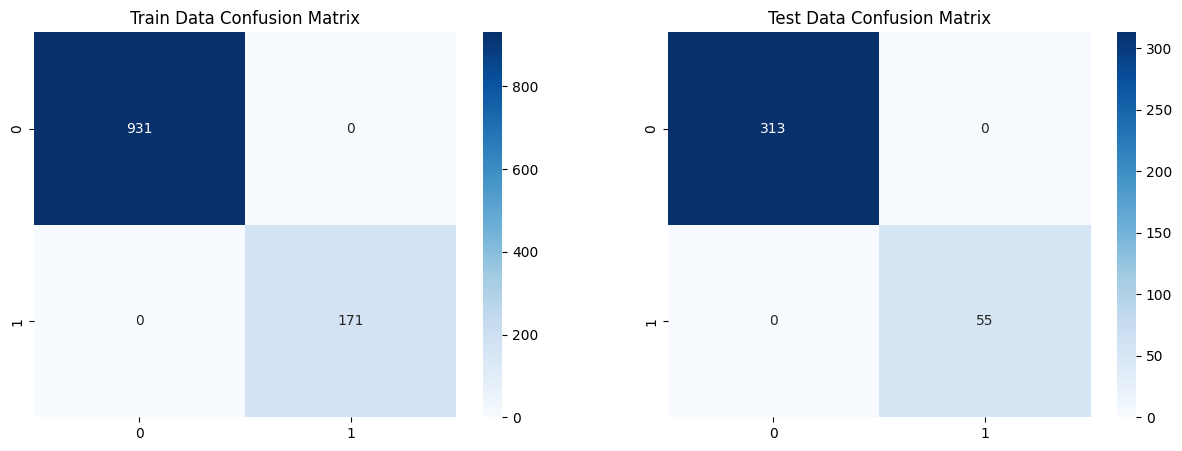

***************************************************************************


In [19]:
from sklearn.metrics import confusion_matrix,classification_report

y_train_pred = LR.predict(x_train)
y_test_pred = LR.predict(x_test)

print(25*"-","Train Data Matrix Report",25*"-")

print(classification_report(y_train, y_train_pred))
print(75*"-")
print(25*"-","Test Data Matrix Report",25*"-")
print(classification_report(y_test, y_test_pred))
print(75*"-")

fig, ax = plt.subplots(1, 2, figsize=(15, 5))

sns.heatmap(confusion_matrix(y_train, y_train_pred),annot=True, fmt='d', cmap='Blues',ax=ax[0])
ax[0].set_title('Train Data Confusion Matrix')

sns.heatmap(confusion_matrix(y_test, y_test_pred),annot=True, fmt='d', cmap='Blues',ax=ax[1])
ax[1].set_title('Test Data Confusion Matrix')

plt.show()
print(75*'*')

In [20]:
y.value_counts()

performancerating
3                    1244
4                     226
Name: count, dtype: int64

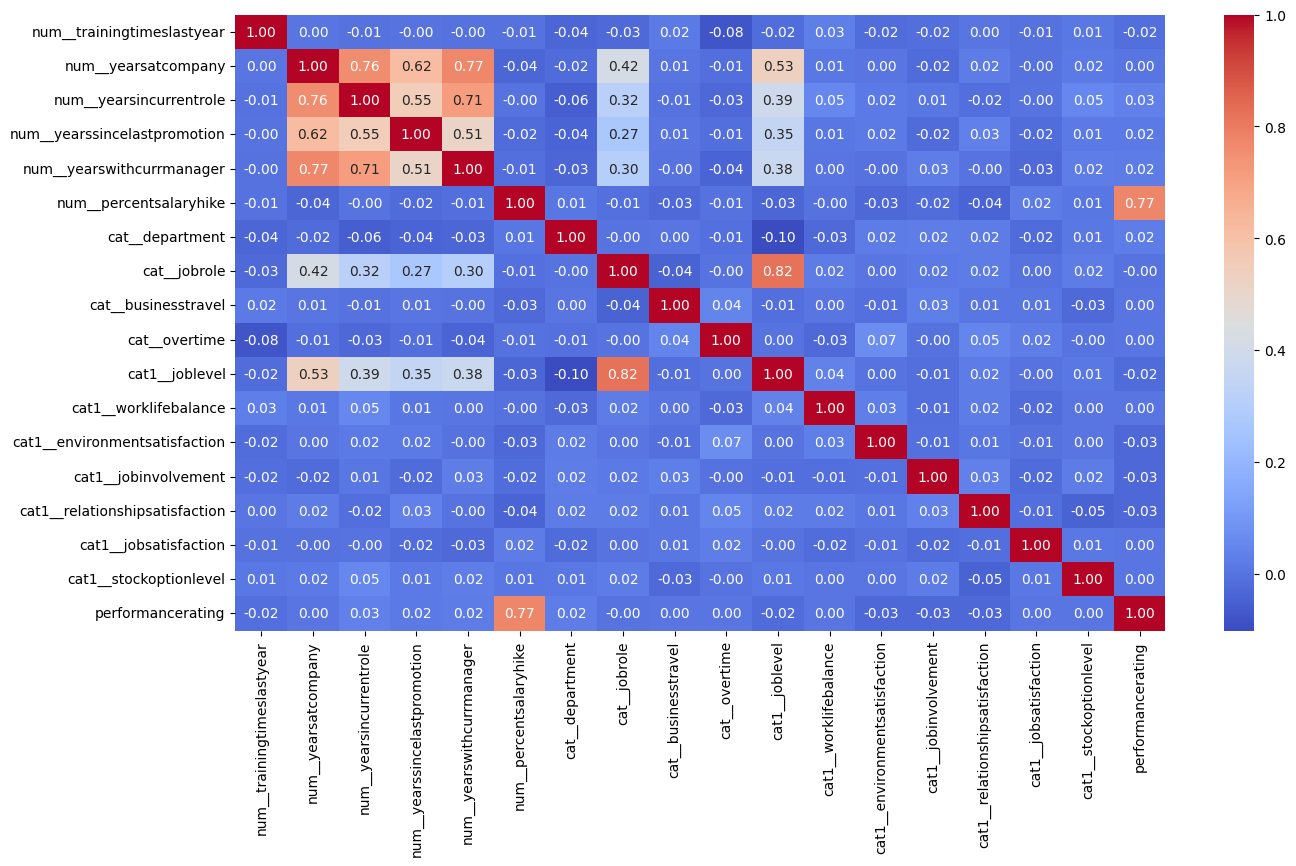

In [25]:
plt.figure(figsize=(15,8))
sns.heatmap(pd.concat([x,y],axis=1).corr(),annot = True,fmt='.2f',cmap = 'coolwarm')
plt.show()